https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input,Dense, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras import regularizers

Using Theano backend.


In [2]:
(x_train,_),(x_test,_) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [3]:
%matplotlib inline

In [4]:
def plot_imgs(decoded_images,n=20):

    plt.figure(figsize=(20,4))
    for i in range(n):
        # original digit
        ax = plt.subplot(2,n,i+1)
        plt.imshow(x_test[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # reconstruction
        ax = plt.subplot(2,n,i+1+n)
        plt.imshow(decoded_images[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    plt.show()

# relu activation

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
5s - loss: 0.3753 - val_loss: 0.2726
Epoch 2/20
6s - loss: 0.2652 - val_loss: 0.2549
Epoch 3/20
6s - loss: 0.2452 - val_loss: 0.2333
Epoch 4/20
7s - loss: 0.2256 - val_loss: 0.2160
Epoch 5/20
6s - loss: 0.2106 - val_loss: 0.2028
Epoch 6/20
6s - loss: 0.1990 - val_loss: 0.1925
Epoch 7/20
6s - loss: 0.1899 - val_loss: 0.1844
Epoch 8/20
6s - loss: 0.1826 - val_loss: 0.1776
Epoch 9/20
5s - loss: 0.1762 - val_loss: 0.1718
Epoch 10/20
5s - loss: 0.1706 - val_loss: 0.1666
Epoch 11/20
7s - loss: 0.1657 - val_loss: 0.1619
Epoch 12/20
7s - loss: 0.1612 - val_loss: 0.1576
Epoch 13/20
5s - loss: 0.1571 - val_loss: 0.1537
Epoch 14/20
5s - loss: 0.1535 - val_loss: 0.1502
Epoch 15/20
5s - loss: 0.1501 - val_loss: 0.1471
Epoch 16/20
5s - loss: 0.1471 - val_loss: 0.1441
Epoch 17/20
5s - loss: 0.1443 - val_loss: 0.1414
Epoch 18/20
5s - loss: 0.1417 - val_loss: 0.1389
Epoch 19/20
5s - loss: 0.1392 - val_loss: 0.1365
Epoch 20/20
5s - loss: 0.136

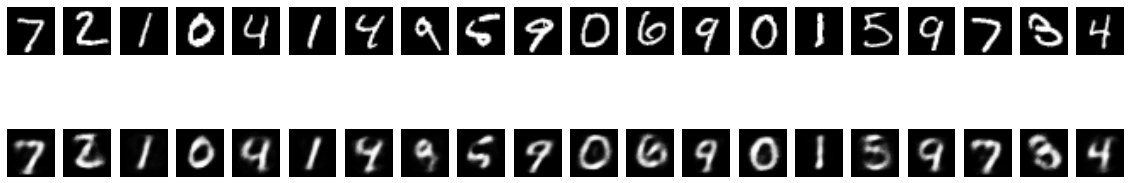

In [25]:
encoded = None
decoded = None

encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output = encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')


autoencoder.fit(x_train, x_train,
               verbose=2,  
               nb_epoch = 20,
               batch_size = 256,
               shuffle=True,
               validation_data=(x_test,x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

plot_imgs(decoded_imgs)

# linear activation

In [ ]:
encoded = None
decoded = None

encoding_dim = 32
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='linear')(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)

encoder = Model(input=input_img, output = encoded)
encoded_input = Input(shape=(encoding_dim,))


decoder_layer = autoencoder.layers[-1]
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')


autoencoder.fit(x_train, x_train,
               verbose=2,  
               nb_epoch = 50,
               batch_size = 256,
               shuffle=True,
               validation_data=(x_test,x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

plot_imgs(decoded_imgs)

# using regularization

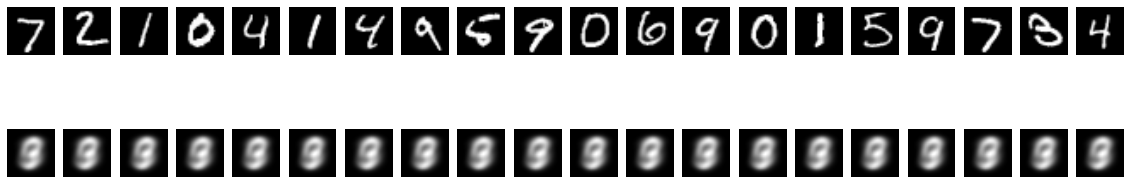

In [27]:
encoded = None
decoded = None

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.activity_l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input=input_img, output=decoded)

encoder = Model(input=input_img, output = encoded)
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')


autoencoder.fit(x_train, x_train,
               verbose=0,  
               nb_epoch = 50,
               batch_size = 256,
               shuffle=True,
               validation_data=(x_test,x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

plot_imgs(decoded_imgs)

# deep autoencoder

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
7s - loss: 0.3473 - val_loss: 0.2634
Epoch 2/100
6s - loss: 0.2568 - val_loss: 0.2460
Epoch 3/100
6s - loss: 0.2341 - val_loss: 0.2252
Epoch 4/100
6s - loss: 0.2226 - val_loss: 0.2169
Epoch 5/100
6s - loss: 0.2115 - val_loss: 0.2028
Epoch 6/100
6s - loss: 0.1970 - val_loss: 0.1915
Epoch 7/100
6s - loss: 0.1851 - val_loss: 0.1798
Epoch 8/100
6s - loss: 0.1777 - val_loss: 0.1737
Epoch 9/100
6s - loss: 0.1721 - val_loss: 0.1683
Epoch 10/100
6s - loss: 0.1668 - val_loss: 0.1623
Epoch 11/100
6s - loss: 0.1618 - val_loss: 0.1584
Epoch 12/100
6s - loss: 0.1578 - val_loss: 0.1541
Epoch 13/100
6s - loss: 0.1533 - val_loss: 0.1505
Epoch 14/100
6s - loss: 0.1497 - val_loss: 0.1468
Epoch 15/100
6s - loss: 0.1467 - val_loss: 0.1432
Epoch 16/100
6s - loss: 0.1440 - val_loss: 0.1411
Epoch 17/100
6s - loss: 0.1417 - val_loss: 0.1404
Epoch 18/100
6s - loss: 0.1397 - val_loss: 0.1384
Epoch 19/100
7s - loss: 0.1379 - val_loss: 0.1368
Epoch 20/

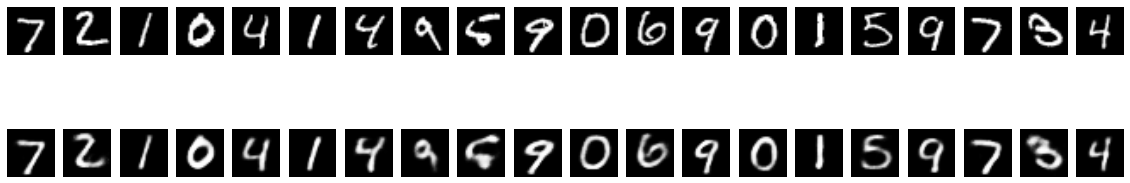

In [5]:
encoded = None
decoded = None

input_img = Input(shape=(784,))

encoded = Dense(128,activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32,activation='relu')(encoded)

decoded = Dense(64,activation='relu')(encoded)
decoded = Dense(128,activation='relu')(decoded)
decoded = Dense(784,activation='sigmoid')(decoded)

autoencoder = Model(input=input_img, output=decoded)


encoder = Model(input=input_img, output = encoded)
encoded_input = Input(shape=(32,))

decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]

decoder = Model(input=encoded_input, output= decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))

autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, nb_epoch=100, verbose=2,
               batch_size=256,shuffle=True,
               validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

plot_imgs(decoded_imgs)

In [11]:
encoded = None
decoded = None

input_img = Input(shape=(1,28,28))
x = Convolution2D(16,3,3, activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((2,2), border_mode='same')(x)
x = Convolution2D(8,3,3, activation='relu', border_mode='same')(x)
x = MaxPooling2D((2,2), border_mode='same')(x)
x = Convolution2D(8,3,3, activation='relu', border_mode='same')(x)

encoded = MaxPooling2D((2,2),border_mode='same')(x)

# at this point the representation has 8 x 4 x 4 = 128 dimensions
x = Convolution2D(8,3,3,activation='relu',border_mode='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Convolution2D(8,3,3, activation='relu', border_mode='same')(x)
x = UpSampling2D((2,2))(x)
x = Convolution2D(16,3,3, activation='relu')(x)
x = UpSampling2D((2,2))(x)

decoded = Convolution2D(1,3,3, activation='sigmoid', border_mode='same')(x)

autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 1, 28, 28))
x_test = np.reshape(x_test, (len(x_test), 1, 28, 28))

# the tutorial suggests we use tensorflow but I'll use theano

autoencoder.fit(x_train,x_train,
            verbose=2,
            nb_epoch=10,
            batch_size=128,
            shuffle=True,
            validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
117s - loss: 0.2436 - val_loss: 0.1810
Epoch 2/10
115s - loss: 0.1735 - val_loss: 0.1590
Epoch 3/10
114s - loss: 0.1561 - val_loss: 0.1473
Epoch 4/10
112s - loss: 0.1447 - val_loss: 0.1394
Epoch 5/10
112s - loss: 0.1379 - val_loss: 0.1324
Epoch 6/10
113s - loss: 0.1323 - val_loss: 0.1330
Epoch 7/10
113s - loss: 0.1285 - val_loss: 0.1271
Epoch 8/10
113s - loss: 0.1257 - val_loss: 0.1220
Epoch 9/10
113s - loss: 0.1232 - val_loss: 0.1208
Epoch 10/10
113s - loss: 0.1209 - val_loss: 0.1193


In [12]:
decoded_imgs = autoencoder.predict(x_test)

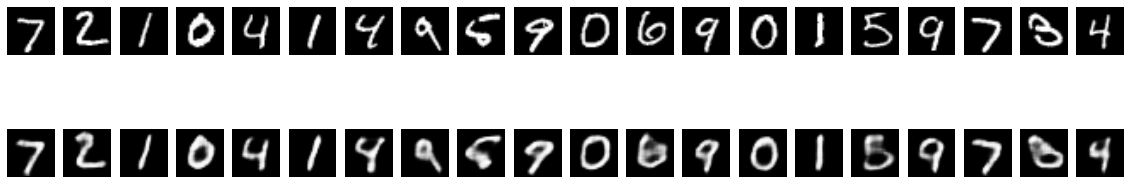

In [13]:
plot_imgs(decoded_imgs)

## denoising

In [20]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 1, 28, 28))
x_test = np.reshape(x_test, (len(x_test), 1, 28, 28))

noise_factor= 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

In [21]:
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy, 0.,1.)

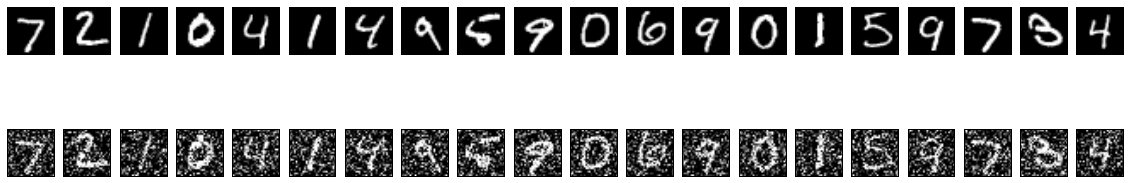

In [22]:
plot_imgs(x_test_noisy)

In [23]:
input_img = Input(shape=(1,28,28))

x = Convolution2D(32,3,3,activation='relu',border_mode='same')(input_img)
x = MaxPooling2D((2,2), border_mode='same')(x)
x = Convolution2D(32,3,3,activation='relu',border_mode='same')(x)
encoded = MaxPooling2D((2,2),border_mode='same')(x)

# at this point the representation is (32,7,7)
x = Convolution2D(32,3,3,activation='relu',border_mode='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Convolution2D(32,3,3,activation='relu',border_mode='same')(x)
x = UpSampling2D((2,2))(x)

decoded = Convolution2D(1,3,3,activation='sigmoid',border_mode='same')(x)

autoencoder = Model(input_img,decoded)

# decoder_layer1 = autoencoder.layers[-4]
# decoder_layer2 = autoencoder.layers[-3]
# decoder_layer3 = autoencoder.layers[-2]
# decoder_layer4 = autoencoder.layers[-1]

# encoded_input = Input(shape=(32,7,7))

# decoder = Model(
#     input=encoded_input, 
#     output= decoder_layer4(decoder_layer3(decoder_layer2(decoder_layer1(encoded_input)))))


autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

# the source is noisy, but the target isn't?
autoencoder.fit(x_train_noisy,x_train,
               nb_epoch=40,
               batch_size=128,
               shuffle=True,
               validation_data=(x_test_noisy,x_test))


decoded_imgs = autoencoder.predict(x_test)
plot_imgs(decoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 274s - loss: 0.2125 - val_loss: 0.1358
Epoch 2/40
60000/60000 [==============================] - 288s - loss: 0.1284 - val_loss: 0.1211
Epoch 3/40
 8320/60000 [===>..........................] - ETA: 208s - loss: 0.1212

KeyboardInterrupt: 